# Boston House Price Prediction using Linear Regression Model with Polynomial Features 

## Context
Boston house price is a dataset which contain information about house price in boston area and basic public information about the surrounding area. 

The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository): 

    CRIM: per capita crime rate by town
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS: proportion of non-retail business acres per town
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    NOX: nitric oxides concentration (parts per 10 million)
    RM: average number of rooms per dwelling
    AGE: proportion of owner-occupied units built prior to 1940
    DIS: weighted distances to ﬁve Boston employment centers
    RAD: index of accessibility to radial highways
    TAX: full-value property-tax rate per $10,000
    PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
    MEDV: Median value of owner-occupied homes in $1000s

## Problem Statement

As a property agent, it is crucial to know the best value of a house so we could get highest profit from selling house and lowest investment when buying house. 

We could infer there are 2 main problems that we could solve with predicting boston house price with machine learning model    

1. We don't have any exact information about specification of a house in boston, but we want to know the house price estimation so we have a better standing if we want appraise house and get the best price.
2. We want to determine a house value in boston based on surrounding area condition, so we could sell house with highest price.


## Goals

1. Create a machine learning model using Linear Regression to predict Boston House Price based on area information
2. Improve machine learning model to increase prediction accuracy
3. Create error distribution 
4. Create evalution matrix to show the perfomance of machine learning model to predict Boston House Price

---

## Import Package

In [150]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

---

## Import Dataset

In [151]:
# Load boston dataset dictionary
boston=load_boston() 

In [152]:
# Show keys in boston dictionary
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [153]:
# Create dataframe from boston dataset
df=pd.DataFrame(data=boston['data'],columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [154]:
# Create target series from boston dictionary
target=pd.Series(boston['target'])

In [155]:
# Merge target series to boston dataframe
df['Price']=target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---

## Data Understanding 

In [156]:
# Show info about each column's datatypes and number of Non-Null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [157]:
# Show info about empty cell for each column
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [158]:
# Descriptive statistic of boston dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [159]:
# Show unique data summary for each column
bsDesc=[]

for i in df.columns:
        bsDesc.append([
            i,
            df[i].dtypes,
            df[i].isna().sum(),
            round((df[i].isna().sum()/len(df))*100,2),
            df[i].nunique(),
            df[i].drop_duplicates().sample(2).values
        ])

pd.DataFrame(data=bsDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'UniqueSample'
            ])

,Features,DataType,Null,NullPercentage,Unique,UniqueSample
0,CRIM,float64,0,0.0,504,"[5.66998, 0.52014]"
1,ZN,float64,0,0.0,26,"[45.0, 75.0]"
2,INDUS,float64,0,0.0,76,"[6.96, 3.33]"
3,CHAS,float64,0,0.0,2,"[1.0, 0.0]"
4,NOX,float64,0,0.0,81,"[0.435, 0.469]"
5,RM,float64,0,0.0,446,"[6.968, 7.104]"
6,AGE,float64,0,0.0,356,"[36.9, 88.4]"
7,DIS,float64,0,0.0,412,"[7.3967, 5.4509]"
8,RAD,float64,0,0.0,9,"[7.0, 2.0]"
9,TAX,float64,0,0.0,66,"[402.0, 287.0]"


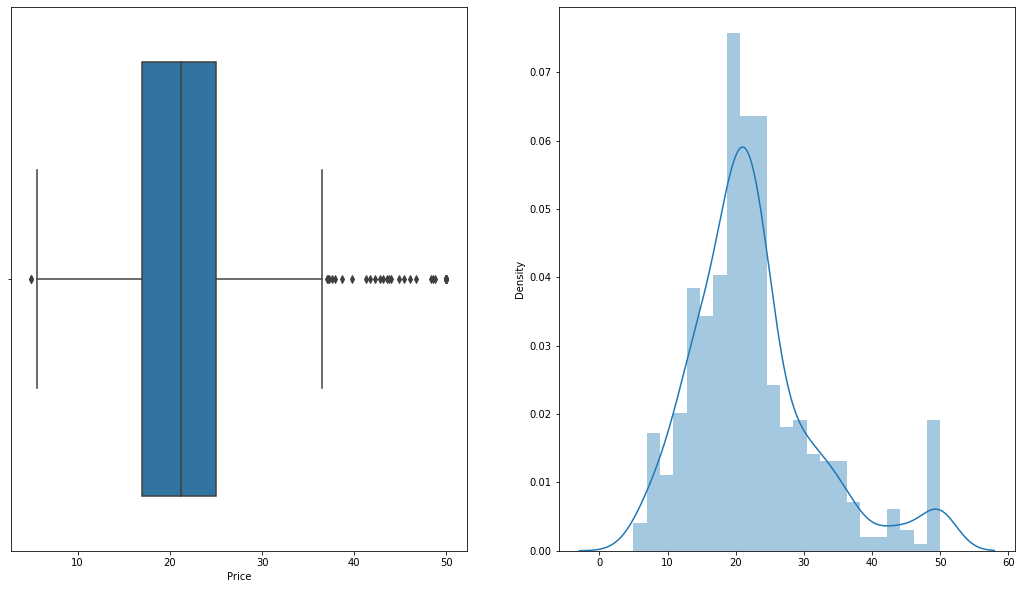

In [160]:
# Show the distribution of Price column
fig, axes = plt.subplots(1,2,figsize=(18, 10))
sns.boxplot(ax=axes[0], x=df['Price'])
sns.distplot(ax=axes[1], x=df['Price'])
plt.show()

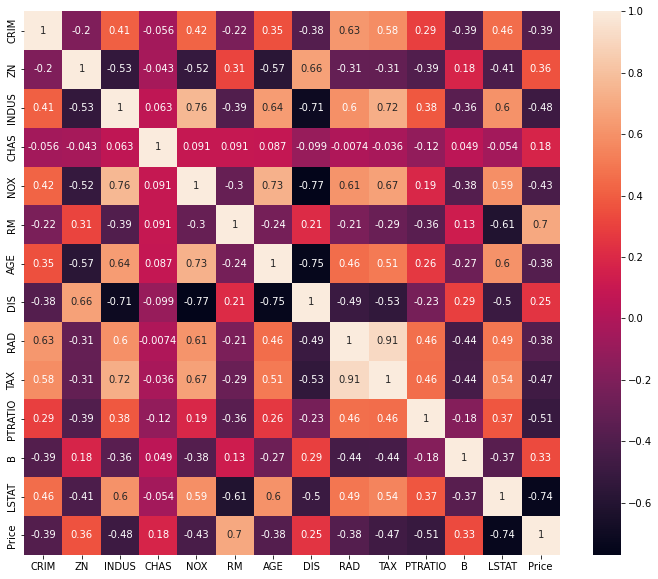

In [161]:
# Show the corellation of each column
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

---

## Feature Selection

In [162]:
# Drop columns with low corellation with target
df.drop(columns=['ZN','CHAS','DIS','RAD','B'], inplace=True)
df.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2


---

## Splitting Data

In [163]:
# Set feature and target variable
x=df.drop(columns='Price')
y=df['Price']

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
x_train, x_test, y_train, y_test=train_test_split(x, y ,test_size=.2, random_state=42)

In [166]:
# Show feature train set
x_train.head() 

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
477,15.02340,18.10,0.6140,5.304,97.3,666.0,20.2,24.91
15,0.62739,8.14,0.5380,5.834,56.5,307.0,21.0,8.47
332,0.03466,6.06,0.4379,6.031,23.3,304.0,16.9,7.83
423,7.05042,18.10,0.6140,6.103,85.1,666.0,20.2,23.29
19,0.72580,8.14,0.5380,5.727,69.5,307.0,21.0,11.28


In [167]:
# Show feature test set
x_test.head() 

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
173,0.09178,4.05,0.510,6.416,84.1,296.0,16.6,9.04
274,0.05644,6.41,0.447,6.758,32.9,254.0,17.6,3.53
491,0.10574,27.74,0.609,5.983,98.8,711.0,20.1,18.07
72,0.09164,10.81,0.413,6.065,7.8,305.0,19.2,5.52
452,5.09017,18.10,0.713,6.297,91.8,666.0,20.2,17.27


In [168]:
# Show target train set
y_train.head() 

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: Price, dtype: float64

In [169]:
# Show target test set
y_test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Price, dtype: float64

In [170]:
# Show train and test composition

In [171]:
x_train.shape

(404, 8)

In [172]:
x_test.shape

(102, 8)

---

## Machine Learning Modelling - Linear Regression

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
# Load Linear Regression Model
Model = LinearRegression(fit_intercept=True)

In [175]:
# Fit train set into model
Model.fit(x_train, y_train)

LinearRegression()

In [176]:
# Determine accuracy score from train set 
Model.score(x_train, y_train)  

0.6973996063603944

In [177]:
# Predict both train and test set with machine learning model
y_train_pred=Model.predict(x_train)
y_test_pred=Model.predict(x_test)

### Error Distribution

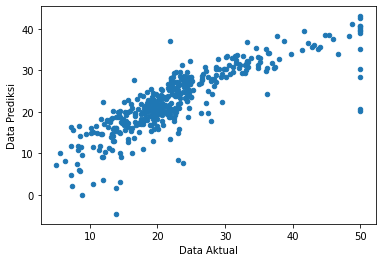

In [178]:
plt.scatter(y_train, y_train_pred, s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Data Prediksi')
plt.show()

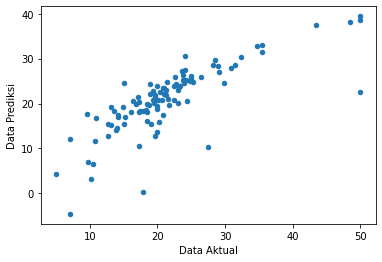

In [179]:
plt.scatter(y_test, y_test_pred, s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Data Prediksi')
plt.show()

In [180]:
training_set=pd.concat([x_train, y_train],axis=1)

In [181]:
testing_set=pd.concat([x_test, y_test],axis=1)

#### Training Set Error Analysis

In [182]:
training_set['price_pred']=y_train_pred

In [183]:
training_set

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred
477,15.02340,18.10,0.6140,5.304,97.3,666.0,20.2,24.91,12.0,9.004057
15,0.62739,8.14,0.5380,5.834,56.5,307.0,21.0,8.47,19.9,20.229797
332,0.03466,6.06,0.4379,6.031,23.3,304.0,16.9,7.83,19.4,24.649416
423,7.05042,18.10,0.6140,6.103,85.1,666.0,20.2,23.29,13.4,14.136756
19,0.72580,8.14,0.5380,5.727,69.5,307.0,21.0,11.28,18.2,18.502492
...,...,...,...,...,...,...,...,...,...,...
106,0.17120,8.56,0.5200,5.836,91.9,384.0,20.9,18.66,19.5,15.745227
270,0.29916,6.96,0.4640,5.856,42.1,223.0,18.6,13.00,21.1,19.969453
348,0.01501,2.01,0.4350,6.635,29.7,280.0,17.0,5.99,24.5,28.465729
435,11.16040,18.10,0.7400,6.629,94.6,666.0,20.2,23.27,13.4,15.855189


In [184]:
training_set['Error']= abs(training_set['Price']-training_set['price_pred'])

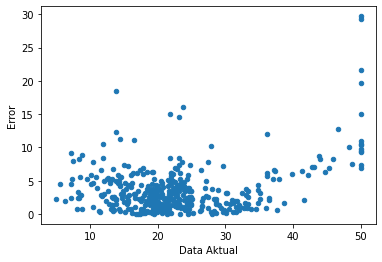

In [185]:
plt.scatter(training_set['Price'], training_set['Error'], s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Error')
plt.show()

#### Error Distribution

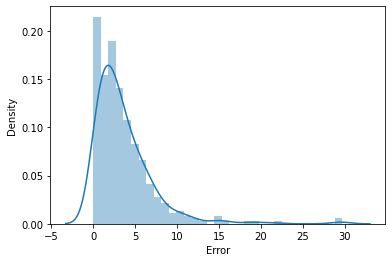

In [186]:
sns.distplot(training_set['Error'])
plt.show()

In [187]:
training_set['Error'].mean()

3.610671589529

In [188]:
training_set.sort_values('Error', ascending=False).head(10)

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred,Error
368,4.89822,18.10,0.631,4.970,100.0,666.0,20.2,3.26,50.0,20.294005,29.705995
372,8.26725,18.10,0.668,5.875,89.6,666.0,20.2,8.88,50.0,20.778254,29.221746
369,5.66998,18.10,0.631,6.683,96.8,666.0,20.2,3.73,50.0,28.329133,21.670867
370,6.53876,18.10,0.631,7.016,97.5,666.0,20.2,2.96,50.0,30.356299,19.643701
374,18.49820,18.10,0.668,4.138,100.0,666.0,20.2,37.97,13.8,-4.645437,18.445437
214,0.28955,10.59,0.489,5.412,9.8,277.0,18.6,29.55,23.7,7.602734,16.097266
364,3.47428,18.10,0.718,8.780,82.9,666.0,20.2,5.29,21.9,36.987446,15.087446
186,0.05602,2.46,0.488,7.831,53.6,193.0,17.8,4.45,50.0,35.057090,14.942910
367,13.52220,18.10,0.631,3.863,100.0,666.0,20.2,13.33,23.1,8.480596,14.619404
228,0.29819,6.20,0.504,7.686,17.0,307.0,17.4,3.92,46.7,33.941764,12.758236


Data with high error have tax with 666.0 value, this value should be dropped to decrease error outliers 

---

## Improvement ML 1 - Project Limitation

In [189]:
## Drop row from tax column with value of 666 
df=df[df['TAX'] != 666]

In [190]:
# Set feature and target variable
x_1=df.drop(columns='Price')
y_1=df['Price']

In [191]:
x_train_1, x_test_1, y_train_1, y_test_1=train_test_split(x_1, y_1 ,test_size=.2, random_state=42)

In [192]:
# Load Linear Regression Model
Model_1 = LinearRegression(fit_intercept=True)

In [193]:
# Fit train set into model
Model_1.fit(x_train_1, y_train_1)

LinearRegression()

In [194]:
# Determine accuracy score from train set 
Model_1.score(x_train_1, y_train_1)  

0.8407826457361679

In [195]:
# Predict both train and test set with machine learning model
y_train_pred_1=Model_1.predict(x_train_1)
y_test_pred_1=Model_1.predict(x_test_1)

### Error Distribution

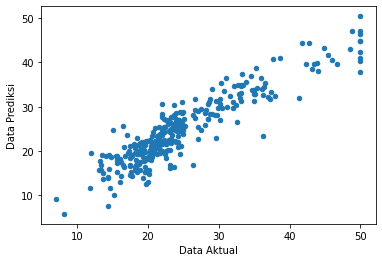

In [196]:
plt.scatter(y_train_1, y_train_pred_1, s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Data Prediksi')
plt.show()

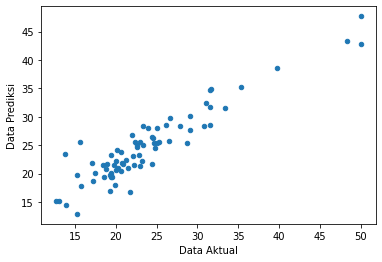

In [197]:
plt.scatter(y_test_1, y_test_pred_1, s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Data Prediksi')
plt.show()

In [198]:
training_set_1=pd.concat([x_train_1, y_train_1],axis=1)

In [199]:
testing_set_1=pd.concat([x_test_1, y_test_1],axis=1)

#### Training Set Error Analysis

In [200]:
training_set_1['price_pred']=y_train_pred_1

In [201]:
training_set_1

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred
192,0.08664,3.44,0.437,7.178,26.3,398.0,15.2,2.87,36.4,34.377953
75,0.09512,12.83,0.437,6.286,45.0,398.0,18.7,8.94,21.4,23.400500
84,0.05059,4.49,0.449,6.389,48.0,247.0,18.5,9.62,23.9,25.309029
494,0.27957,9.69,0.585,5.926,42.6,391.0,19.2,13.59,24.5,19.222708
16,1.05393,8.14,0.538,5.935,29.3,307.0,21.0,6.58,23.1,20.257214
...,...,...,...,...,...,...,...,...,...,...
71,0.15876,10.81,0.413,5.961,17.5,305.0,19.2,9.88,21.7,21.734434
106,0.17120,8.56,0.520,5.836,91.9,384.0,20.9,18.66,19.5,15.229503
270,0.29916,6.96,0.464,5.856,42.1,223.0,18.6,13.00,21.1,20.729729
348,0.01501,2.01,0.435,6.635,29.7,280.0,17.0,5.99,24.5,28.833118


In [202]:
training_set_1['Error']= abs(training_set_1['Price']-training_set_1['price_pred'])

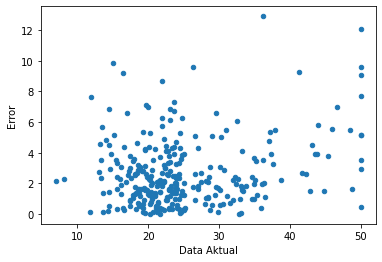

In [203]:
plt.scatter(training_set_1['Price'], training_set_1['Error'], s=20)
plt.xlabel('Data Aktual')
plt.ylabel('Error')
plt.show()

#### Error Distribution

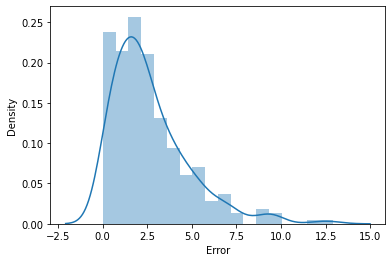

In [204]:
sns.distplot(training_set_1['Error'])
plt.show()

In [205]:
training_set_1['Error'].mean()

2.664590632363677

In [206]:
training_set_1.sort_values('Error', ascending=False).head(10)

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred,Error
181,0.06888,2.46,0.488,6.144,62.2,193.0,17.8,9.45,36.2,23.296457,12.903543
161,1.46336,19.58,0.605,7.489,90.8,403.0,14.7,1.73,50.0,37.913370,12.086630
10,0.22489,7.87,0.524,6.377,94.3,311.0,15.2,20.45,15.0,24.854358,9.854358
186,0.05602,2.46,0.488,7.831,53.6,193.0,17.8,4.45,50.0,40.395158,9.604842
184,0.08308,2.46,0.488,5.604,89.8,193.0,17.8,13.98,26.4,16.830472,9.569528
157,1.22358,19.58,0.605,6.943,97.4,403.0,14.7,4.59,41.3,32.045135,9.254865
342,0.02498,1.89,0.518,6.540,59.7,422.0,15.9,8.65,16.5,25.724258,9.224258
162,1.83377,19.58,0.605,7.802,98.2,403.0,14.7,1.92,50.0,40.940386,9.059614
240,0.11329,4.93,0.428,6.897,54.3,300.0,16.6,11.38,22.0,30.678061,8.678061
166,2.01019,19.58,0.605,7.929,96.2,403.0,14.7,3.70,50.0,42.276133,7.723867


---

## Improvement ML 2 - Polynomial Feature

In [207]:
## Import polynomial feature package
from sklearn.preprocessing import PolynomialFeatures

In [208]:
Poli=PolynomialFeatures(degree=2,include_bias=False, interaction_only=True)

In [209]:
Poli=Poli.fit(x_train_1)

In [210]:
x_train_1_poli=Poli.transform(x_train_1)

In [211]:
x_test_1_poli=Poli.transform(x_test_1)

In [212]:
df_xtrain1poli=pd.DataFrame(x_train_1_poli)
df_xtrain1poli.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.08664,3.44,0.437,7.178,26.3,398.0,15.2,2.87,0.298042,0.037862,...,188.7814,2856.844,109.1056,20.60086,10467.4,399.76,75.481,6049.6,1142.26,43.624
1,0.09512,12.83,0.437,6.286,45.0,398.0,18.7,8.94,1.220390,0.041567,...,282.8700,2501.828,117.5482,56.19684,17910.0,841.50,402.300,7442.6,3558.12,167.178
2,0.05059,4.49,0.449,6.389,48.0,247.0,18.5,9.62,0.227149,0.022715,...,306.6720,1578.083,118.1965,61.46218,11856.0,888.00,461.760,4569.5,2376.14,177.970
3,0.27957,9.69,0.585,5.926,42.6,391.0,19.2,13.59,2.709033,0.163548,...,252.4476,2317.066,113.7792,80.53434,16656.6,817.92,578.934,7507.2,5313.69,260.928
4,1.05393,8.14,0.538,5.935,29.3,307.0,21.0,6.58,8.578990,0.567014,...,173.8955,1822.045,124.6350,39.05230,8995.1,615.30,192.794,6447.0,2020.06,138.180


In [213]:
df_xtest1poli=pd.DataFrame(x_test_1_poli)
df_xtest1poli.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.06724,3.24,0.460,6.333,17.2,430.0,16.9,7.34,0.217858,0.030930,...,108.9276,2723.190,107.0277,46.48422,7396.0,290.68,126.248,7267.0,3156.20,124.046
1,1.15172,8.14,0.538,5.701,95.0,307.0,21.0,18.35,9.375001,0.619625,...,541.5950,1750.207,119.7210,104.61335,29165.0,1995.00,1743.250,6447.0,5633.45,385.350
2,0.62739,8.14,0.538,5.834,56.5,307.0,21.0,8.47,5.106955,0.337536,...,329.6210,1791.038,122.5140,49.41398,17345.5,1186.50,478.555,6447.0,2600.29,177.870
3,0.19186,7.38,0.493,6.431,14.7,287.0,19.6,5.08,1.415927,0.094587,...,94.5357,1845.697,126.0476,32.66948,4218.9,288.12,74.676,5625.2,1457.96,99.568
4,0.01432,1.32,0.411,6.816,40.5,256.0,15.1,3.95,0.018902,0.005886,...,276.0480,1744.896,102.9216,26.92320,10368.0,611.55,159.975,3865.6,1011.20,59.645


In [214]:
# Load Linear Regression Model
Model_2 = LinearRegression(fit_intercept=True)

In [215]:
# Fit train set into model
Model_2.fit(df_xtrain1poli, y_train_1)

LinearRegression()

In [216]:
# Determine accuracy score from train set 
Model_2.score(df_xtrain1poli, y_train_1)  

0.9262897320417016

In [217]:
# Predict both train and test set with machine learning model
y_train_pred_1_poli=Model_2.predict(x_train_1_poli)
y_test_pred_1_poli=Model_2.predict(x_test_1_poli)

---

## Evaluation Matrix

In [218]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [219]:
## Create function for evaluation matrix
def Eva_Matrix(Model,x,y_true):
    y_pred=Model.predict(x)
    R2=r2_score(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    MSE=mean_squared_error(y_true,y_pred)
    RMSE=np.sqrt(MSE)
    return R2,MAE,MSE,RMSE

In [220]:
## Linear Regression Training
r2_LR_train,MAE_LR_train,MSE_LR_train,RMSE_LR_train=Eva_Matrix(Model,x_train,y_train)
## Linear Regression Testing
r2_LR_test,MAE_LR_test,MSE_LR_test,RMSE_LR_test=Eva_Matrix(Model,x_test,y_test)
## Linear Regression with Project Limitation 
r2_LR_1_train,MAE_LR_1_train,MSE_LR_1_train,RMSE_LR_1_train=Eva_Matrix(Model_1,x_train_1,y_train_1)
## Linear Regression wi|th Project Limitation
r2_LR_1_Test,MAE_LR_1_test,MSE_LR_1_test,RMSE_LR_1_test=Eva_Matrix(Model_1,x_test_1,y_test_1)
## Linear Regression with Project Limitation Polynomial Feature
r2_LR_1_PF_train,MAE_LR_1_PF_train,MSE_LR_1_PF_train,RMSE_LR_1_PF_train=Eva_Matrix(Model_2,df_xtrain1poli,y_train_1)
## Linear Regression wi|th Project Limitation Polynomial Feature
r2_LR_1_PF_Test,MAE_LR_1_PF_test,MSE_LR_1_PF_test,RMSE_LR_1_PF_test=Eva_Matrix(Model_2,df_xtest1poli,y_test_1)

In [221]:
## EVALUATION MATRIX COMPARISON
eva_matrix={
    'Linear Regression Training':[r2_LR_train,MAE_LR_train,MSE_LR_train,RMSE_LR_train],
    'Linear Regression Testing':[r2_LR_test,MAE_LR_test,MSE_LR_test,RMSE_LR_test],
    'LinReg after Project Limitation Training':[r2_LR_1_train,MAE_LR_1_train,MSE_LR_1_train,RMSE_LR_1_train],
    'LinReg after Project Limitation Testing':[r2_LR_1_Test,MAE_LR_1_test,MSE_LR_1_test,RMSE_LR_1_test],
    'LinReg after Polynomial Feature Training':[r2_LR_1_PF_train,MAE_LR_1_PF_train,MSE_LR_1_PF_train,RMSE_LR_1_PF_train],
    'LinReg after Polynomial Feature Testing':[r2_LR_1_PF_Test,MAE_LR_1_PF_test,MSE_LR_1_PF_test,RMSE_LR_1_PF_test],
}
summary=pd.DataFrame(eva_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summary.T

,R-Squared,MAE,MSE,RMSE
Linear Regression Training,0.70,3.61,26.29,5.13
Linear Regression Testing,0.62,3.40,28.03,5.29
LinReg after Project Limitation Training,0.84,2.66,11.82,3.44
LinReg after Project Limitation Testing,0.84,2.23,8.70,2.95
LinReg after Polynomial Feature Training,0.93,1.79,5.47,2.34
LinReg after Polynomial Feature Testing,0.87,2.01,7.10,2.66
